<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.766082,65.749741,36.897946,9.155820,220.569590,214.629698,5.939891
1,0.0,1.0,52.337549,58.638416,82.687940,3.250482,206.914387,203.516979,3.397408
2,0.0,2.0,45.476165,79.083289,97.219802,8.428531,240.207787,233.024105,7.183682
3,0.0,3.0,74.021728,51.761058,32.476923,-0.597678,167.662031,167.603682,0.058349
4,0.0,4.0,95.421556,73.604032,56.079161,-1.450525,233.654224,239.419012,-5.764787
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.671340,30.462156,91.330538,4.161429,170.625462,169.278873,1.346589
19996,999.0,16.0,65.126670,51.578863,93.380305,5.817596,225.903435,222.834010,3.069426
19997,999.0,17.0,49.705626,73.212704,60.986364,3.058041,196.962735,193.553770,3.408965
19998,999.0,18.0,83.476847,46.756974,69.646442,2.091491,211.971754,212.066906,-0.095151


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.766082,65.749741,36.897946,9.155820,220.569590,214.629698,5.939891
1,0.0,1.0,52.337549,58.638416,82.687940,3.250482,206.914387,203.516979,3.397408
2,0.0,2.0,45.476165,79.083289,97.219802,8.428531,240.207787,233.024105,7.183682
3,0.0,3.0,74.021728,51.761058,32.476923,-0.597678,167.662031,167.603682,0.058349
4,0.0,4.0,95.421556,73.604032,56.079161,-1.450525,233.654224,239.419012,-5.764787
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.671340,30.462156,91.330538,4.161429,170.625462,169.278873,1.346589
19996,999.0,16.0,65.126670,51.578863,93.380305,5.817596,225.903435,222.834010,3.069426
19997,999.0,17.0,49.705626,73.212704,60.986364,3.058041,196.962735,193.553770,3.408965
19998,999.0,18.0,83.476847,46.756974,69.646442,2.091491,211.971754,212.066906,-0.095151


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.766082  65.749741  36.897946  ...  220.569590  214.629698  5.939891
      1.0    52.337549  58.638416  82.687940  ...  206.914387  203.516979  3.397408
      2.0    45.476165  79.083289  97.219802  ...  240.207787  233.024105  7.183682
      3.0    74.021728  51.761058  32.476923  ...  167.662031  167.603682  0.058349
      4.0    95.421556  73.604032  56.079161  ...  233.654224  239.419012 -5.764787
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   34.671340  30.462156  91.330538  ...  170.625462  169.278873  1.346589
      16.0   65.126670  51.578863  93.380305  ...  225.903435  222.834010  3.069426
      17.0   49.705626  73.212704  60.986364  ...  196.962735  193.553770  3.408965
      18.0   83.476847  46.756974  69.646442  ...  211.971754  212.066906 -0.095151
      19.0   64.127761  57.012059  59.490356  ...  183.855302  191.311577 -7.456274

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.766082  65.749741  36.897946  ...  220.569590  214.629698  5.939891
      1.0    52.337549  58.638416  82.687940  ...  206.914387  203.516979  3.397408
      2.0    45.476165  79.083289  97.219802  ...  240.207787  233.024105  7.183682
      3.0    74.021728  51.761058  32.476923  ...  167.662031  167.603682  0.058349
      4.0    95.421556  73.604032  56.079161  ...  233.654224  239.419012 -5.764787
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   34.671340  30.462156  91.330538  ...  170.625462  169.278873  1.346589
      16.0   65.126670  51.578863  93.380305  ...  225.903435  222.834010  3.069426
      17.0   49.705626  73.212704  60.986364  ...  196.962735  193.553770  3.408965
      18.0   83.476847  46.756974  69.646442  ...  211.971754  212.066906 -0.095151
      19.0   64.127761  57.012059  59.490356  ...  183.855302  191.311577 -7.456274

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.766082,65.749741,36.897946,9.155820,220.569590,214.629698,5.939891
1,0.0,1.0,52.337549,58.638416,82.687940,3.250482,206.914387,203.516979,3.397408
2,0.0,2.0,45.476165,79.083289,97.219802,8.428531,240.207787,233.024105,7.183682
3,0.0,3.0,74.021728,51.761058,32.476923,-0.597678,167.662031,167.603682,0.058349
4,0.0,4.0,95.421556,73.604032,56.079161,-1.450525,233.654224,239.419012,-5.764787
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.671340,30.462156,91.330538,4.161429,170.625462,169.278873,1.346589
19996,999.0,16.0,65.126670,51.578863,93.380305,5.817596,225.903435,222.834010,3.069426
19997,999.0,17.0,49.705626,73.212704,60.986364,3.058041,196.962735,193.553770,3.408965
19998,999.0,18.0,83.476847,46.756974,69.646442,2.091491,211.971754,212.066906,-0.095151


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    98.766082  65.749741  36.897946  ...  220.569590  214.629698  5.939891
      1.0    52.337549  58.638416  82.687940  ...  206.914387  203.516979  3.397408
      2.0    45.476165  79.083289  97.219802  ...  240.207787  233.024105  7.183682
      3.0    74.021728  51.761058  32.476923  ...  167.662031  167.603682  0.058349
      4.0    95.421556  73.604032  56.079161  ...  233.654224  239.419012 -5.764787
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   34.671340  30.462156  91.330538  ...  170.625462  169.278873  1.346589
      16.0   65.126670  51.578863  93.380305  ...  225.903435  222.834010  3.069426
      17.0   49.705626  73.212704  60.986364  ...  196.962735  193.553770  3.408965
      18.0   83.476847  46.756974  69.646442  ...  211.971754  212.066906 -0.095151
      19.0   64.127761  57.012059  59.490356  ...  183.855302  191.311577 -7.456274

[20000 rows x 7 columns]

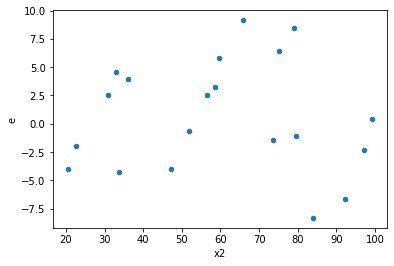

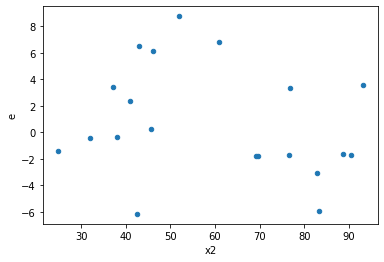

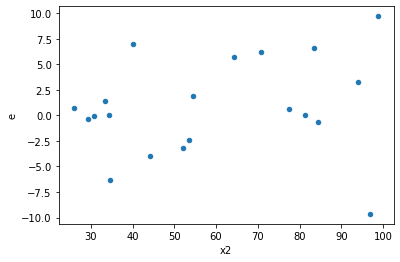

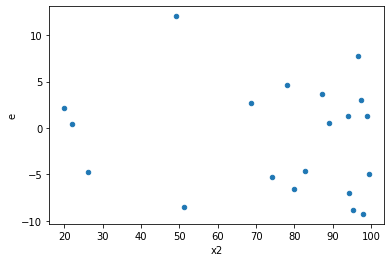

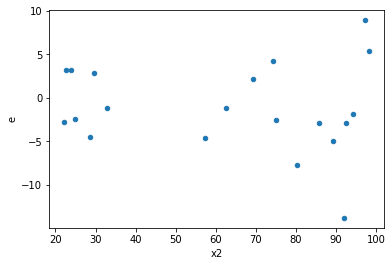

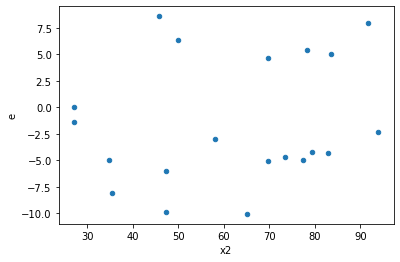

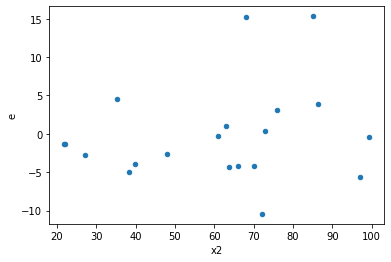

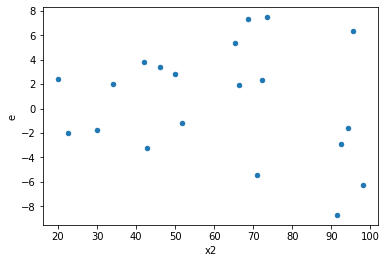

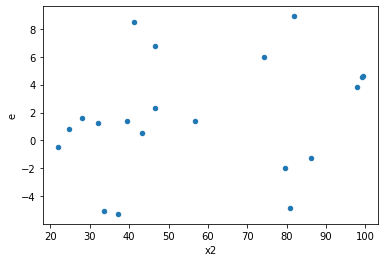

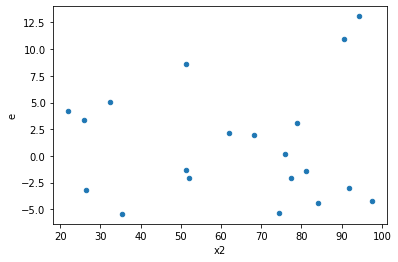

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,54.34351172049629,64.00840809802058,10.868702344099258,12.801681619604116,1.1778482117098639,0.861827477372733,0.5690862613136335,0.4309137386863665,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,46.430725024048606,54.672774353099285,9.286145004809722,10.934554870619857,1.177512828515638,0.8620652054854261,0.568967397257287,0.43103260274271304,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,88.12375480104684,92.77393027505686,17.62475096020937,18.55478605501137,1.0527686942585288,0.9563743725821152,0.5218128137089424,0.4781871862910576,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,57.10979345517621,219.38517536747094,11.421958691035242,43.877035073494184,3.841463295426902,0.16597124341969383,0.9170143782901531,0.08298562170984691,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,41.2876384184539,401.634475051929,8.25752768369078,80.3268950103858,9.727717312899511,0.025998447751736986,0.9870007761241315,0.012999223875868493,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,44.67237910780912,213.63478209229604,8.934475821561824,42.72695641845921,4.782256650730985,0.11096260113029244,0.9445186994348538,0.05548130056514622,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,72.56835160639459,139.49118341966073,14.513670321278918,27.898236683932147,1.9222041059475992,0.49052157691405607,0.754739211542972,0.24526078845702803,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,142.5746606706134,260.78662521227125,28.51493213412268,52.15732504245425,1.8291232396109987,0.523561378604642,0.738219310697679,0.261780689302321,Reject001=1 : Homoscedasticity
10.0,5.0,5.0,69.10557411919925,118.11405992232494,13.82111482383985,23.622811984464988,1.7091828181412925,0.5706733691756081,0.714663315412196,0.28533668458780403,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,54.34351172049629,64.00840809802058,10.868702344099258,12.801681619604116,1.1778482117098639,0.861827477372733,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,46.430725024048606,54.672774353099285,9.286145004809722,10.934554870619857,1.177512828515638,0.8620652054854261,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,88.12375480104684,92.77393027505686,17.62475096020937,18.55478605501137,1.0527686942585288,0.9563743725821152,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,269.1845831728377,107.68867721138918,53.83691663456754,21.537735442277835,0.40005514410253046,0.3374387673896712,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,57.10979345517621,219.38517536747094,11.421958691035242,43.877035073494184,3.841463295426902,0.16597124341969383,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,268.6069409012132,140.179115002219,53.72138818024264,28.0358230004438,0.5218745075309625,0.4925774052129081,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,41.2876384184539,401.634475051929,8.25752768369078,80.3268950103858,9.727717312899511,0.025998447751736986,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,44.67237910780912,213.63478209229604,8.934475821561824,42.72695641845921,4.782256650730985,0.11096260113029244,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,72.56835160639459,139.49118341966073,14.513670321278918,27.898236683932147,1.9222041059475992,0.49052157691405607,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      963
Reject001=0 : Heteroscedasticity     37
Name: Result_test, dtype: int64